---
## Homework 04 - Clustering and the K-means Algorithm
---


### Problem 1:  

We will be implementing the K-means algorithm in this homework assignment. Specifically, we will analyze varieties of irises to see if we can classify them to their correct species based on their features.

There are three species of iris in the given data set:
- versicolor
- setosa
- virginica


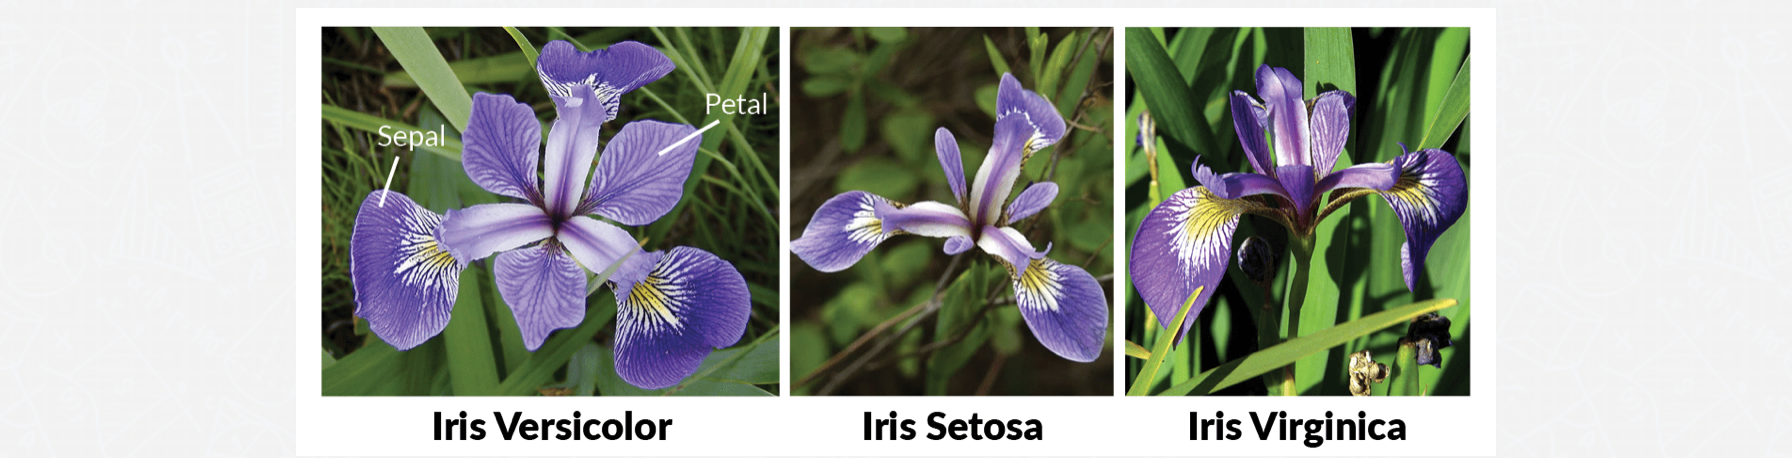


**PART A:** Load in the dataset by executing the cells below. Please read the comments as you go.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris_data = datasets.load_iris()

In [2]:
# This will tell us the data categories. Looks like we are dealing with 4-vectors.
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# Next, we will convert the data as is, to a pandas dataframe. This is a matter of
# personal preference. Pandas is a popular library that many people utilize. However,
# it's worth noting that there are various ways to access and analyze the data.

dfIris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [4]:
#Executing this cell will print our DataFrame to the screen. Each row is a data point with 
# 4 features. There are a total of 150 irises listed here, each with sepal length and width
# and petal length and width.
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
# Lastly, executing this cell will show you the "target" groupings for the iris classification.
#- 0 corresponds to setosa
#- 1 corresponds to versicolor
#- 2 corresponds to virginica

iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---
### Helpful Hint for the next portion of the problem. 

You can isolate a row of the `dfIris` dataframe using a command like the one below. The cell below isolates the row with index = 147 from our Iris dataframe.

In [6]:
dfIris.iloc[147,:]

sepal length (cm)    6.5
sepal width (cm)     3.0
petal length (cm)    5.2
petal width (cm)     2.0
Name: 147, dtype: float64

You can isolate individual numbers like so:

In [7]:
x1 = dfIris.iloc[147,0]
x2 = dfIris.iloc[147,1]
x3 = dfIris.iloc[147,2]
x4 = dfIris.iloc[147,3]

In [8]:
print("Tuple for datapoint 147:({},{},{},{})".format(x1,x2,x3,x4))

Tuple for datapoint 147:(6.5,3.0,5.2,2.0)


**PART B:** Implement the k-Means algorithm to cluster the 150 vectors (data points) into $k=3$ separate groups.

Notes:
- You may use/re-use code from the in-class notebook from Sections 4.4 & 4.5
- Run 100 iterations of k-Means.

In [9]:
#def 


#First we will select 3 arbitrary group members.

k = 3
N = len(dfIris)
rows = np.arange(0,N,1)
group_representatives = np.random.choice(rows, size=k)

list_of_group_reps = []

# This for loop will make a list of the (x1,x2,x3,x4) coordinates for each representative
for rep_num in range(k):
    x1 = dfIris.iloc[rep_num,0]
    x2 = dfIris.iloc[rep_num,1]
    x3 = dfIris.iloc[rep_num,2]
    x4 = dfIris.iloc[rep_num,3]
    
    representative = (x1,x2,x3,x4)
    list_of_group_reps.append(representative)

num_iter = 100
    
for iterr in range(num_iter):
    distances = []
    group_history = []
    for i in range(N):
        for j in range(k):
            # Compute distance from data point i to each group reppresentative for the k groups
            dist = np.sqrt((dfIris.iloc[i,0] - list_of_group_reps[j][0])**2+(dfIris.iloc[i,1] - list_of_group_reps[j][1])**2 + (dfIris.iloc[i,2] - list_of_group_reps[j][2])**2 + (dfIris.iloc[i,3] - list_of_group_reps[j][3])**2)
            distances.append(dist)
        group_names = np.arange(0,k,1)
  
        x = zip(distances,group_names)
    
        #Choose the minimum distance
        best_group = min(x)
    
        #Pull out the group name based on the minimum distance compute above
        best_group = best_group[1]
    
        #Keep track of each data point and which group it has been assigned to.
        group_history.append(best_group)
        
        #Empty out the distances list for the next data point
        distances = []
            
    # Now we have a group assignment for each data point. Prior to doing another
    # iteration of kMeans, we must compute the centroid of each cluster and 
    # set our group representatives to this centroid.
        
    # Note, this is hard-coded for 3 groupings.
    group0 = []
    group1 = []
    group2 = []

    for index, item in enumerate(group_history):
        if item == 0:
            group0.append(index)
        elif item == 1:
            group1.append(index)
        elif item == 2:
            group2.append(index)
        
    groups_by_idx = [group0,group1,group2]
    new_list_of_group_reps = []

    for group in groups_by_idx:
    
        sum_x1 = 0
        sum_x2 = 0
        sum_x3 = 0
        sum_x4 = 0
        
        for idx_val in group:
            sum_x1 += dfIris.iloc[idx_val,0]
            sum_x2 += dfIris.iloc[idx_val,1]
            sum_x3 += dfIris.iloc[idx_val,2]
            sum_x4 += dfIris.iloc[idx_val,3]

        centroid_group = (sum_x1/len(group),sum_x2/len(group),sum_x3/len(group),sum_x4/len(group))
        new_list_of_group_reps.append(centroid_group) 
            
    list_of_group_reps = new_list_of_group_reps
        


**PART C:** Execute the following two cells to first display the clusterings of your data points. In each image, the left plot shows your clustering and the right plot shows the actual species each data point belongs to.

- first with petal length vs petal width 
- second with sepal length vs sepal width 

Write a brief summary on how you feel your clustering algorithm performed in grouping the data into three clusters. This is a qualitative summary. We will do a more quantitative analysis next.

In [10]:
# Note, it may be that your algorithm called one cluster "group 2" while the target called the same cluster "group 0"
# If this is the case, you can apply this simple shift. 
group_history = [abs(g-2) for g in group_history]

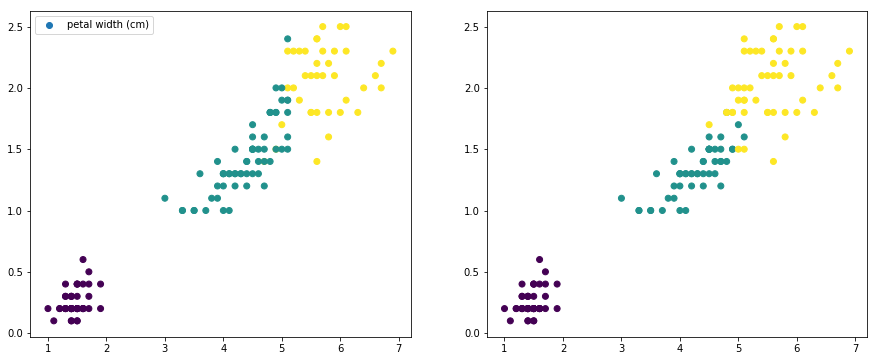

In [11]:
# Plot of petal length vs petal width using the clustering from Part B
fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,6) )
ax[0].scatter(dfIris["petal length (cm)"], dfIris["petal width (cm)"], c=group_history)
ax[1].scatter(dfIris["petal length (cm)"], dfIris["petal width (cm)"], c=iris_data.target)

ax[0].legend()

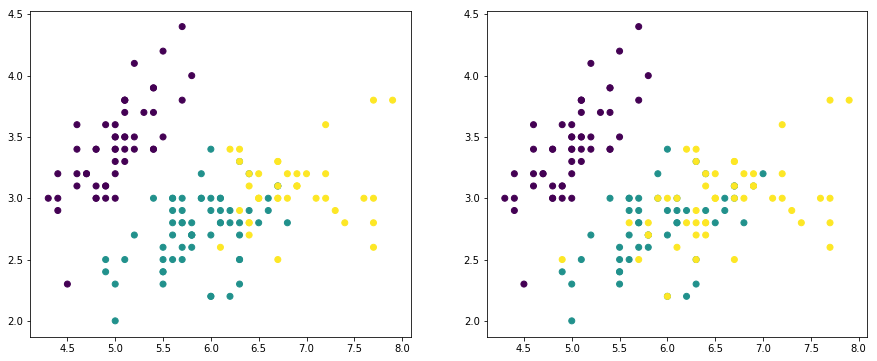

In [12]:
# Plot of petal length vs petal width using the clustering from Part B

fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,6) )

ax[0].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=group_history)
ax[1].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=iris_data.target)

**PART D:** Use your `group_history` list (shifted if necessary) along with the actual species categorization given by `iris_data.target` to compute the percentage of data points that your k-means algorithm matched. 

In [13]:
set_difference = group_history - iris_data.target

In [14]:
num_match = set_difference == 0

num_match = np.sum(num_match)

In [15]:
percent_match = num_match/len(group_history)

In [16]:
print("This algorithm correctly matched {}% of the data points.".format(100*percent_match))

This algorithm correctly matched 88.66666666666667% of the data points.


**PART E:** Use the KMeans model from sklearn to make a cluster model. 

**Bonus**: +3 bonus points if you can figure out how to compute the percentage of points that KMeans from sklearn matches with the actual species classification from iris_data.target.

In [31]:
from sklearn.cluster import KMeans

In [32]:
model = KMeans(n_clusters=3)

In [33]:
model.fit(dfIris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
groups = model.labels_

In [35]:
groups
    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [28]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

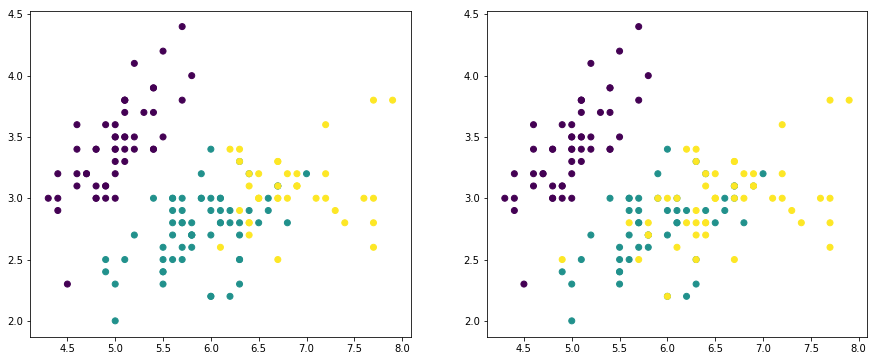

In [36]:
fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,6) )

ax[0].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=groups)
ax[1].scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=iris_data.target)

In [37]:
set_difference = groups - iris_data.target

num_match = set_difference == 0

num_match = np.sum(num_match)

percent_match = num_match/len(group_history)

print("This algorithm correctly matched {}% of the data points.".format(100*percent_match))

This algorithm correctly matched 89.33333333333333% of the data points.
